# NEW HOTS 05 - Testing different architectures on N-MNIST

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *

dataset = 'nmnist'

# 1. Hots with homeostasis (best results of nbk NH 04)

0.7

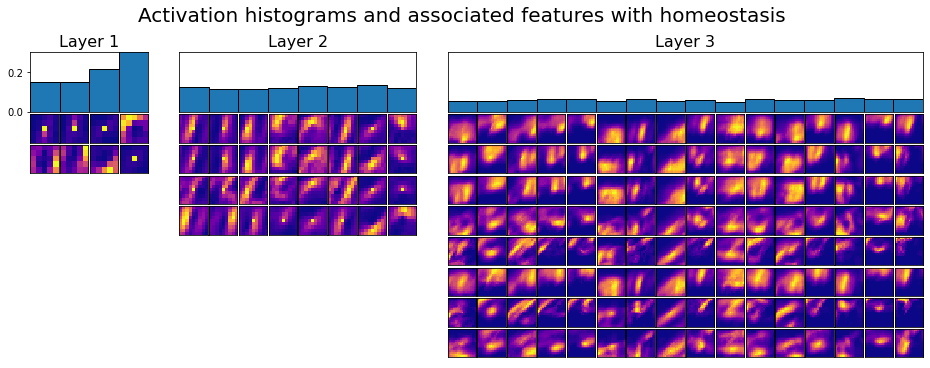

In [3]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
accuracy(trainmaphom, testmaphom, 'bhatta')

## 1.1 Testing different tauz

In [4]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    if not os.path.isfile(fname):
        loaderhom = hotshom.learning1by1()
        trainmaphom, loaderhom = hotshom.training(loaderhom)
        testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [06:06<00:00,  9.17s/it]


bhatta:80.0% - eucli:77.5% - norm:77.5%
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [05:06<00:00,  7.66s/it]


bhatta:57.49999999999999% - eucli:57.49999999999999% - norm:57.49999999999999%


## 1.2 Testing different architectures

In [14]:
homeo = True
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        if not os.path.isfile(fname):
            loaderhom = hotshom.learning1by1()
            trainmaphom, loaderhom = hotshom.training(loaderhom)
            testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
            with open(fname, 'wb') as file:
                pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname, 'rb') as file:
                hotshom, trainmaphom, testmaphom = pickle.load(file)

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:35<00:00,  2.39s/it]


bhatta:15.0% - eucli:12.5% - norm:12.5%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:35<00:00,  2.40s/it]


bhatta:35.0% - eucli:35.0% - norm:35.0%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:44<00:00,  2.62s/it]


bhatta:35.0% - eucli:35.0% - norm:32.5%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4, 8].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [03:08<00:00,  4.72s/it]


bhatta:40.0% - eucli:37.5% - norm:37.5%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [04:01<00:00,  6.03s/it]


bhatta:37.5% - eucli:37.5% - norm:37.5%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16, 32].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [06:05<00:00,  9.14s/it]


bhatta:42.5% - eucli:40.0% - norm:40.0%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8, 16, 32].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [10:19<00:00, 15.50s/it]


bhatta:57.49999999999999% - eucli:60.0% - norm:60.0%
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16, 32, 64].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [17:08<00:00, 25.70s/it]


bhatta:65.0% - eucli:57.49999999999999% - norm:57.49999999999999%


In [ ]:
homeo = True
tau = 5#for tau in [0.1, 0.5, 1, 2, 5, 10]:
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        accb = 

# 2. Filtering all TS on the best results

# 3. Stronger filter on the best results

# 4. No homeostasis on the best results

# 5. Training all layers at the same time